In [1]:
import sklearn, pickle, gzip
with gzip.open('../../data/20newsgroups.pkl.gz', 'rb') as f:
    newsgroups_train = pickle.load(f)

In [2]:
print newsgroups_train.target_names

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
len(newsgroups_train.data)

11314

In [4]:
print newsgroups_train.data[0]

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [5]:
print newsgroups_train.target_names[newsgroups_train.target[0]]

rec.autos


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(11314, 56124)

In [7]:
vectors[0]

<1x56124 sparse matrix of type '<type 'numpy.int64'>'
	with 52 stored elements in Compressed Sparse Row format>

In [8]:
print vectors[0]

  (0, 31590)	2
  (0, 53733)	2
  (0, 51668)	2
  (0, 20324)	2
  (0, 50060)	1
  (0, 13562)	5
  (0, 36726)	1
  (0, 40280)	1
  (0, 26716)	1
  (0, 41924)	1
  (0, 52029)	1
  (0, 33339)	1
  (0, 15247)	1
  (0, 38672)	1
  (0, 1412)	1
  (0, 54590)	1
  (0, 20972)	1
  (0, 44850)	1
  (0, 17594)	1
  (0, 19462)	1
  (0, 47446)	1
  (0, 32219)	1
  (0, 31247)	1
  (0, 5135)	1
  (0, 20117)	1
  :	:
  (0, 12395)	1
  (0, 19464)	1
  (0, 42368)	1
  (0, 46671)	1
  (0, 7903)	1
  (0, 12728)	1
  (0, 45544)	1
  (0, 43335)	1
  (0, 11933)	1
  (0, 30671)	1
  (0, 49708)	1
  (0, 34895)	1
  (0, 20933)	1
  (0, 47261)	1
  (0, 55583)	1
  (0, 40862)	1
  (0, 26364)	1
  (0, 28066)	1
  (0, 23697)	1
  (0, 32221)	1
  (0, 32914)	1
  (0, 49938)	1
  (0, 27454)	1
  (0, 12514)	1
  (0, 36256)	1


In [9]:
vectors.nnz / float(vectors.shape[0])

105.50053031642213

In [10]:
vectors.shape

(11314, 56124)

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=50, max_iter=5)
%time fit = lda.fit_transform(vectors)

CPU times: user 2min 4s, sys: 0 ns, total: 2min 4s
Wall time: 2min 4s


From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







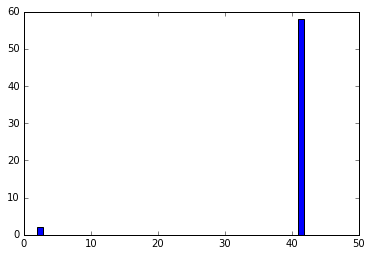

From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)
Subject: Diamond SS24X, Win 3.1, Mouse cursor
Organization: National Library of Medicine
Lines: 10


Anybody seen mouse cursor distortion running the Diamond 1024x768x256 driver?
Sorry, don't know the version of the driver (no indication in the menus) but it's a recently
delivered Gateway system.  Am going to try the latest drivers from Diamond BBS but wondered
if anyone else had seen this.

post or email

--Don Lindbergh
dabl2@lhc.nlm.nih.gov



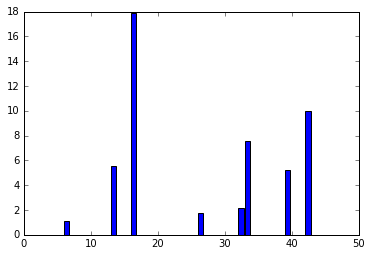

From: cdw2t@dayhoff.med.Virginia.EDU (Dances With Federal Rangers)
Subject: Re: Misc./buying info. needed
Organization: University of Virginia
Lines: 28

In article <1993Apr18.160449.1@hamp.hampshire.edu> jyaruss@hamp.hampshire.edu writes:

>Is there a buying guide for new/used motorcycles (that lists reliability, how
>to go about the buying process, what to look for, etc...)?

_Cycle World_ puts one out, but I'm sure it's not very objective.  Try talking
with dealers and the people that hang out there, as well as us.  We love to
give advice.

>Is there a pricing guide for new/used motorcycles (Blue Book)?

Most of the bigger banks have a blue book which includes motos -- ask for the
one with RVs in it.

>Are there any books/articles on riding cross country, motorcycle camping, etc?

Couldn't help you here.

>Is there an idiots' guide to motorcycles?

You're reading it.

----------------------------------------------------------------------------
|        Cliff Weston           DoD# 05

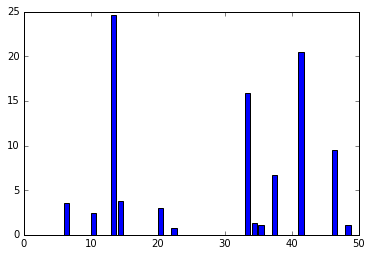

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
n = range(len(fit[0]))
print newsgroups_train.data[0]
plt.bar(n, fit[0])
plt.show()
print newsgroups_train.data[1000]
plt.bar(n, fit[1000])
plt.show()
print newsgroups_train.data[2000]
plt.bar(n, fit[2000])
plt.show()

In [13]:
from sklearn import manifold
tsne = manifold.TSNE(n_components=2)
%time X_tsne = tsne.fit_transform(fit)

CPU times: user 3min 12s, sys: 15 s, total: 3min 27s
Wall time: 3min 27s


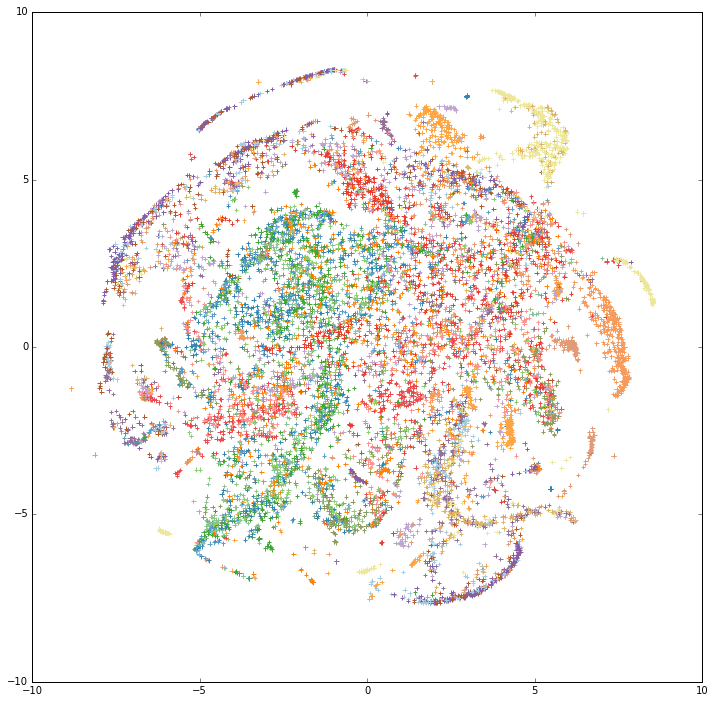

In [14]:
from matplotlib import cm
plt.figure(figsize=(12,12))
plt.scatter(X_tsne[:,0], X_tsne[:,1], marker='+', cmap=cm.Paired, c=newsgroups_train.target)
plt.show()